In [50]:
# imports
using Plots
using AWS
using Minio
using Rasters, ZarrDatasets
using Dates


In [2]:
# a small test to see if we can read a zarr dataset from a minio bucket
# some credentials for testing 
# NOTE: these credentials are valid until 1-apr-2025
# file: .aws/credentials
# [default]
# aws_access_key_id=3qM1e6veyLD0CrGHkgFq
# aws_secret_access_key=yX29hDGsIn2ACbzk1ZjpWKugAl2cmM2uk0no6UxO
#
# [minio_deltares]
# aws_access_key_id=3qM1e6veyLD0CrGHkgFq
# aws_secret_access_key=yX29hDGsIn2ACbzk1ZjpWKugAl2cmM2uk0no6UxO
#
# file: .aws/config
# [default]
# region=eu-west-1
# output=json

# [profile minio_deltares]
# region=eu-west-1
# output=json

In [2]:
# Dataset names
base_url="s3://emodnet"
test_url="$(base_url)/DCSM-FM_0_5nm_1980-2023_his.zarr"
#profile="default"
profile="minio_deltares" #switch to a specific profile instead of default
c = AWS.AWSConfig(profile=profile)
mc = Minio.MinioConfig("https://s3.deltares.nl", c.credentials; region="eu-west-1") # use Minio.jl to point to correct server
AWS.global_aws_config(mc) # set the global config to the minio server, because you can't pass the config to the Raster constructor yet

MinioConfig(URI("https://s3.deltares.nl"), "eu-west-1", (3qM1e6veyLD0CrGHkgFq, yX2..., 146138512-12-31T23:59:59))

In [3]:
# open datasets, but do not load them into memory
his_data=RasterStack(test_url;lazy=true)
his_data

╭─────────────────────────╮
│ 317×2319985 RasterStack │
├─────────────────────────┴────────────────────────────────────────────── dims ┐
  ↓ stations,
  → Ti       Sampled{Dates.DateTime} [1979-12-22T00:00:00, …, 2024-01-31T00:00:00] ForwardOrdered Irregular Points
├────────────────────────────────────────────────────────────────────── layers ┤
  :station_name         eltype: Union{Missing, Zarr.MaxLengthStrings.MaxLengthString{256, UInt8}} dims: stations size: 317
  :station_x_coordinate eltype: Union{Missing, Float64} dims: stations size: 317
  :station_y_coordinate eltype: Union{Missing, Float64} dims: stations size: 317
  :waterlevel           eltype: Union{Missing, Float64} dims: stations, Ti size: 317×2319985
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.Zarrsource} of Dict{String, Any} with 18 entries:
  "date_created"             => "2024-03-29T17:35:06+0100"
  "long_name"                => "flow element center velocity vect

In [18]:
his_data.station_name[114]
istation=findfirst(x->x=="HOEKVHLD",his_data.station_name[:])

his_data

╭─────────────────────────╮
│ 317×2319985 RasterStack │
├─────────────────────────┴────────────────────────────────────────────── dims ┐
  ↓ stations,
  → Ti       Sampled{Dates.DateTime} [1979-12-22T00:00:00, …, 2024-01-31T00:00:00] ForwardOrdered Irregular Points
├────────────────────────────────────────────────────────────────────── layers ┤
  :station_name         eltype: Union{Missing, Zarr.MaxLengthStrings.MaxLengthString{256, UInt8}} dims: stations size: 317
  :station_x_coordinate eltype: Union{Missing, Float64} dims: stations size: 317
  :station_y_coordinate eltype: Union{Missing, Float64} dims: stations size: 317
  :waterlevel           eltype: Union{Missing, Float64} dims: stations, Ti size: 317×2319985
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.Zarrsource} of Dict{String, Any} with 18 entries:
  "date_created"             => "2024-03-29T17:35:06+0100"
  "long_name"                => "flow element center velocity vect

In [53]:
ff=dims(wl,Ti)

UndefVarError: UndefVarError: `stations` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

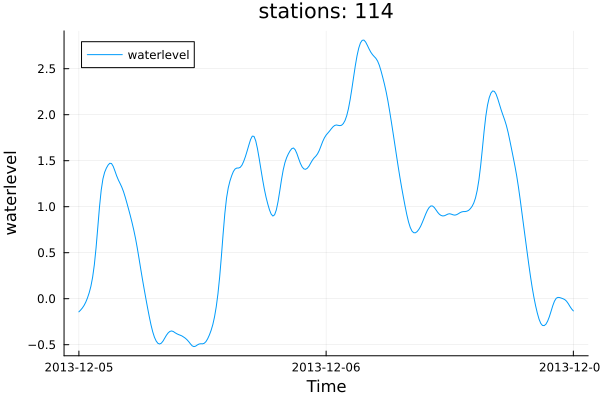

In [ ]:

tfirst=DateTime(2013,12,5,0,0,0)
tlast=DateTime(2013,12,7,0,0,0)
fff=wl[stations=114,Ti=tfirst..tlast]
plot(fff)

In [47]:
# do someting with the DCSM history data
wl=his_data.waterlevel
# all_times=lookup(wl,Ti())
all_stations=lookup(wl,stations())
# time[1]
# station_name="HOEKVHLD"
tfirst=DateTime(2013,12,5,0,0,0)
tlast=DateTime(2013,12,7,0,0,0)
series1=wl[stations=114,Ti=tfirst..tlast]
series1

UndefVarError: UndefVarError: `stations` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [13]:
# Dataset names
base_url="s3://emodnet"
test_url="$(base_url)/emodnet2024_landmask.zarr"
#profile="default"
profile="minio_deltares" #switch to a specific profile instead of default
c = AWS.AWSConfig(profile=profile)
mc = Minio.MinioConfig("https://s3.deltares.nl", c.credentials; region="eu-west-1") # use Minio.jl to point to correct server
AWS.global_aws_config(mc) # set the global config to the minio server, because you can't pass the config to the Raster constructor yet

MinioConfig(URI("https://s3.deltares.nl"), "eu-west-1", (3qM1e6veyLD0CrGHkgFq, yX2..., 146138512-12-31T23:59:59))

In [14]:
# open datasets, but do not load them into memory
test_data=Raster(test_url;lazy=true)

╭──────────────────────────────────────────────────────────────╮
│ 345640×172840 Raster{Union{Missing, Float64},2} landsea_mask │
├──────────────────────────────────────────────────────────────┴───────── dims ┐
  ↓ X Mapped{Float64} [-180.0203125, -180.01927083333334, …, 180.01927083333334, 180.0203125] ForwardOrdered Regular Points,
  → Y Mapped{Float64} [-90.0203125, -90.01927083333334, …, 90.01927083333334, 90.0203125] ForwardOrdered Regular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.Zarrsource} of Dict{String, Any} with 8 entries:
  "units"         => "1"
  "missing_value" => 255
  "coordinates"   => "lat lon"
  "add_offset"    => 0.0
  "long_name"     => "Land-sea mask"
  "scale_factor"  => 1.0
  "standard_name" => "land_binary_mask"
  "_FillValue"    => 255
├────────────────────────────────────────────────────────────────────── raster ┤
  extent: Extent(X = (-180.0203125, 180.0203125), Y = (-90.0203125, 90.0203125))


In [ ]:
# select a small region)
Δ=0.01 #full res dx=0.00416
x_sel=0.0:Δ:3.0
y_sel=50.0:Δ:52.0
#mask_sel=test_data[X=Near(x_sel),Y=Near(y_sel)] # this is very slow
# at full resolution - only do this for small regions
mask_sel=test_data[X=x_sel[1] .. x_sel[end],Y=y_sel[1] .. y_sel[end]]
# x_sel=lookup(mask_sel,X)
# y_sel=lookup(mask_sel,Y)
@show mask_sel
#heatmap(x_sel,y_sel,collect(depth_sel)')
heatmap(mask_sel,color=:viridis)

## Minio readonly settings
```json
{
 "Version": "2012-10-17",
 "Statement": [
  {
   "Sid": "ListObjectsInBucket",
   "Effect": "Allow",
   "Action": [
    "s3:ListBucket"
   ],
   "Resource": [
    "arn:aws:s3:::emodnet"
   ]
  },
  {
   "Sid": "ObjectActions",
   "Effect": "Allow",
   "Action": [
    "s3:ListBucket",
    "s3:GetBucketLocation",
    "s3:GetObject"
   ],
   "Resource": [
    "arn:aws:s3:::emodnet/*"
   ]
  }
 ]
}
```

In [15]:
# scaleway
# Dataset names
base_url="s3://ai-hydro"
test_url="$(base_url)/DCSM-FM_0_5nm_1980-2023_his.zarr"
profile="minio_scaleway" #switch to a specific profile instead of default
c = AWS.AWSConfig(profile=profile)
mc = Minio.MinioConfig("s3.nl-ams.scw.cloud", c.credentials; region="nl-ams") # use Minio.jl to point to correct server
AWS.global_aws_config(mc) # set the global config to the minio server, because you can't pass the config to the Raster constructor yet

MinioConfig(URI("s3.nl-ams.scw.cloud"), "nl-ams", (SCWWVE0YA6N5EVY7EC0Z, ada..., 146138512-12-31T23:59:59))

In [22]:
#using AWS: @service
@service S3

#aws_config = AWSConfig(; creds=nothing, region="eu-central-1")
a = S3.list_objects("wetwin")

HTTP.Exceptions.ConnectError: HTTP.ConnectError for url = `s3.nl-ams.scw.cloud/wetwin`: ArgumentError: Invalid getaddrinfo argument
Stacktrace:
 [1] getalladdrinfo(host::String)
   @ Sockets ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/Sockets/src/addrinfo.jl:76
 [2] getalladdrinfo
   @ ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/Sockets/src/addrinfo.jl:122 [inlined]
 [3] getconnection(::Type{Sockets.TCPSocket}, host::SubString{String}, port::SubString{String}; keepalive::Bool, readtimeout::Int64, kw::@Kwargs{require_ssl_verification::Bool, iofunction::Nothing, decompress::Nothing, verbose::Int64})
   @ HTTP.Connections ~/.julia/packages/HTTP/sJD5V/src/Connections.jl:520
 [4] getconnection
   @ ~/.julia/packages/HTTP/sJD5V/src/Connections.jl:508 [inlined]
 [5] #10
   @ ~/.julia/packages/HTTP/sJD5V/src/Connections.jl:467 [inlined]
 [6] macro expansion
   @ ~/.julia/packages/ConcurrentUtilities/QOkoO/src/try_with_timeout.jl:82 [inlined]
 [7] (::ConcurrentUtilities.var"#2#4"{Any, Timer, ConcurrentUtilities.TimedOut{Any}, Channel{Any}, HTTP.Connections.var"#10#13"{Sockets.TCPSocket, Bool, Bool, @Kwargs{readtimeout::Int64, iofunction::Nothing, decompress::Nothing, verbose::Int64}, SubString{String}, SubString{String}}})()
   @ ConcurrentUtilities ~/.julia/packages/ConcurrentUtilities/QOkoO/src/ConcurrentUtilities.jl:9

In [18]:
# open history dataset, but do not load them into memory
dcsm_data=Raster(test_url;lazy=true,consolidated=true)

HTTP.Exceptions.ConnectError: HTTP.ConnectError for url = `s3.nl-ams.scw.cloud/ai-hydro?list-type=2&max-keys=1&delimiter=&prefix=DCSM-FM_0_5nm_1980-2023_his.zarr%2F.zarray`: ArgumentError: Invalid getaddrinfo argument
Stacktrace:
 [1] getalladdrinfo(host::String)
   @ Sockets ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/Sockets/src/addrinfo.jl:76
 [2] getalladdrinfo
   @ ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/Sockets/src/addrinfo.jl:122 [inlined]
 [3] getconnection(::Type{Sockets.TCPSocket}, host::SubString{String}, port::SubString{String}; keepalive::Bool, readtimeout::Int64, kw::@Kwargs{require_ssl_verification::Bool, iofunction::Nothing, decompress::Nothing, verbose::Int64})
   @ HTTP.Connections ~/.julia/packages/HTTP/sJD5V/src/Connections.jl:520
 [4] getconnection
   @ ~/.julia/packages/HTTP/sJD5V/src/Connections.jl:508 [inlined]
 [5] #10
   @ ~/.julia/packages/HTTP/sJD5V/src/Connections.jl:467 [inlined]
 [6] macro expansion
   @ ~/.julia/packages/ConcurrentUtilities/QOkoO/src/try_with_timeout.jl:82 [inlined]
 [7] (::ConcurrentUtilities.var"#2#4"{Any, Timer, ConcurrentUtilities.TimedOut{Any}, Channel{Any}, HTTP.Connections.var"#10#13"{Sockets.TCPSocket, Bool, Bool, @Kwargs{readtimeout::Int64, iofunction::Nothing, decompress::Nothing, verbose::Int64}, SubString{String}, SubString{String}}})()
   @ ConcurrentUtilities ~/.julia/packages/ConcurrentUtilities/QOkoO/src/ConcurrentUtilities.jl:9

In [ ]:
using AWS: @service
@service S3

aws_config = AWSConfig(; creds=nothing, region="eu-central-1")
a = S3.list_objects("copernicus-dem-30m/"; aws_config)